Number of Layers: 9
Variance score: 0.9397155195266741
Mean Squared Error of test data:  0.617848942096
Mean Squared Error of train data:  0.194743411576
Real new dose :  [  4.  10.   8.   8.   3.   2.   7.  12.   4.  10.   8.   4.  12.  10.  10.]
Predicted new dose:  [  3.72174866  10.0410735    8.27314897   8.00778792   2.71211937
   3.30879638   7.29277535  10.59797139   4.30368644   8.11088723
   7.18117061   3.62908282  11.27005047  10.49849955   9.87207162]


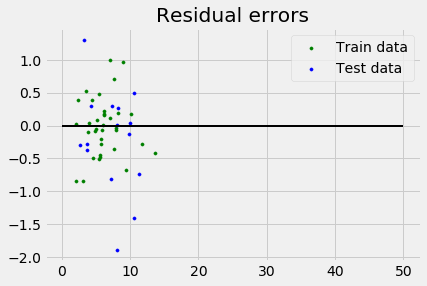

In [17]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.neural_network import MLPRegressor
from sklearn import datasets, metrics
import csv
from copy import deepcopy

def load_csv(filename):
    raw_data = open(filename, 'rt')
    reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
    x = list(reader)
    data = np.array(x).astype('float')
    return data
    
def splitDataset(dataset, splitratio):
    trainsize = int(np.round(dataset.shape[0]*splitratio))
    trainset = np.zeros((trainsize,dataset.shape[1]))#array to store the training set.
    testset = deepcopy(dataset)#create a copy of the dataset in test set.
    for numsamples in range(trainsize):
        indx = np.random.randint(0,testset.shape[0])#random index generation
        trainset[numsamples,:] = testset[indx,:]#adding the randomly selected data vector to the training set
        testset = np.delete(testset, indx, axis = 0)#delete the selected observation from the test set.
    return trainset,testset

data = load_csv('preprocessed_data.csv')
trainset, testset = splitDataset(data,0.7)

x_train = trainset[:,:-1]
y_train = trainset[:,-1]

x_test = testset[:,:-1]
y_test = testset[:,-1]
  
number_of_layers = 9
    
print('Number of Layers: %d' %(number_of_layers))
# create ANN regression object 
reg = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(i,), random_state=1)

# train the model using the training sets 
reg.fit(x_train, y_train)

# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(x_test, y_test)))

# mean squared error
print('Mean Squared Error of test data: ', metrics.mean_squared_error(y_test, reg.predict(x_test)))
print('Mean Squared Error of train data: ', metrics.mean_squared_error(y_train, reg.predict(x_train)))

# real and predicted new dose
print('Real new dose : ', y_test)
print('Predicted new dose: ', reg.predict(x_test))

# plot for residual error

## setting plot style 
plt.style.use('fivethirtyeight') 

## plotting residual errors in training data 
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Residual errors") 

## function to show plot 
plt.show()
